In [1]:
# Basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno

# Visualization libraries
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# Plotly visualization
import chart_studio.plotly as py
import plotly.tools as tls


# Any results you write to the current directory are saved as output.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Display markdown formatted output like bold, italic bold etc.
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_deaths.csv


<a id="22"></a> <br>
### Introduction to 2019-nCoV Dataset
We will be performing exploratory data analysis

In [2]:
data = pd.read_csv("../input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv") # Loading Day level information on 2019-nCoV affected cases to "data"
# Splits our data into train, valid and test. 10% validation, 10% testing, 80% for training

head = data.head()
tail = data.tail()

conc_data_row = pd.concat([head,tail], axis =0, ignore_index =True)
conc_data_row

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,1268,02/11/2020 20:44:00,"Madison, WI",US,2020-02-05 21:53:02,1.0,0.0,0.0
6,1269,02/11/2020 20:44:00,"Orange, CA",US,2020-02-01 19:53:03,1.0,0.0,0.0
7,1270,02/11/2020 20:44:00,"San Diego County, CA",US,2020-02-11 01:23:05,1.0,0.0,0.0
8,1271,02/11/2020 20:44:00,"Seattle, WA",US,2020-02-09 07:03:04,1.0,0.0,1.0
9,1272,02/11/2020 20:44:00,"Tempe, AZ",US,2020-02-01 19:43:03,1.0,0.0,0.0


In [3]:
# Simple statistics on this dataset
data.describe()

,Sno,Confirmed,Deaths,Recovered
count,1272.00000,1272.000000,1272.000000,1272.00000
mean,636.50000,295.830975,6.496069,17.53695
std,367.33908,2123.883545,63.786463,125.80237
min,1.00000,0.000000,0.000000,0.00000
25%,318.75000,2.000000,0.000000,0.00000
50%,636.50000,11.000000,0.000000,0.00000
75%,954.25000,87.000000,0.000000,3.00000
max,1272.00000,33366.000000,1068.000000,2639.00000


In [4]:
# This is information about the dataset itself
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 8 columns):
Sno               1272 non-null int64
Date              1272 non-null object
Province/State    940 non-null object
Country           1272 non-null object
Last Update       1272 non-null object
Confirmed         1272 non-null float64
Deaths            1272 non-null float64
Recovered         1272 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 79.6+ KB


In [5]:
# Converting Date and Last Update objects to datetime
data['Last Update'] = data['Last Update'].apply(pd.to_datetime)
data['Date'] = data['Date'].apply(pd.to_datetime)
data.drop(['Sno'],axis=1,inplace=True)
data = data.replace("nan", np.nan)
data.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


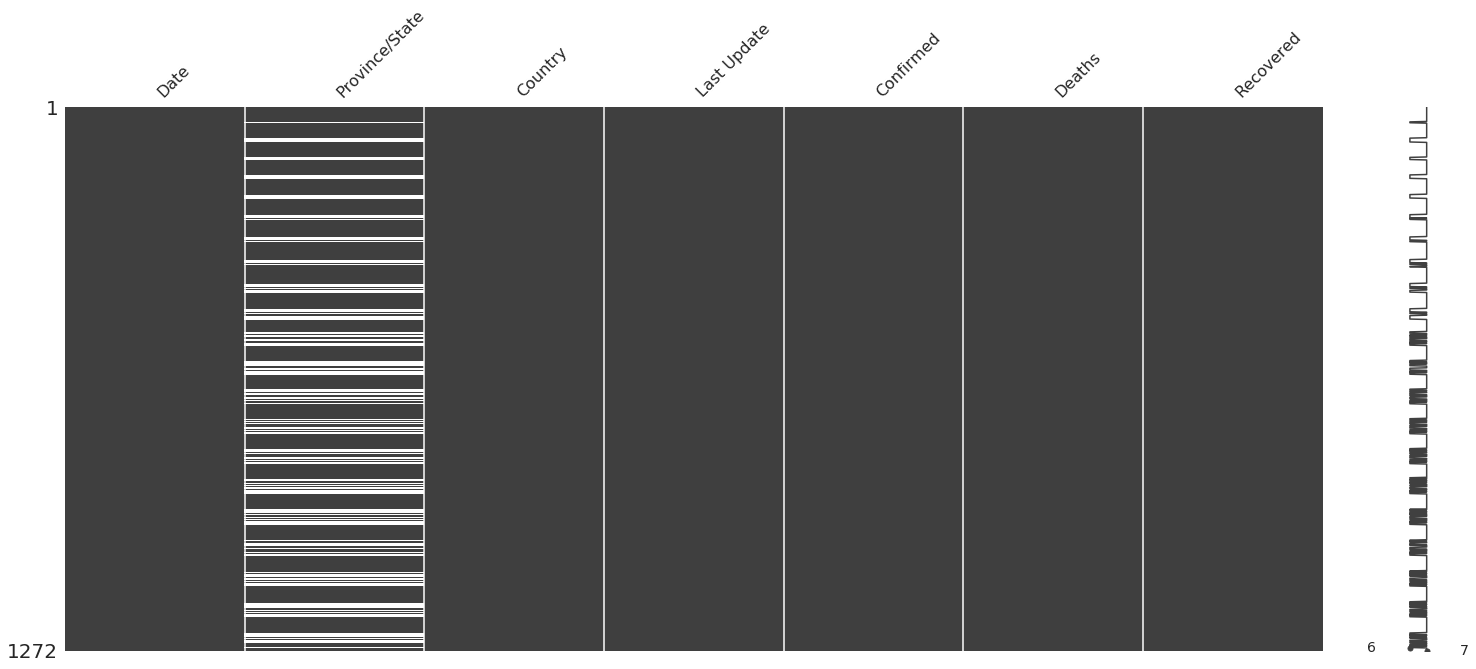

In [6]:
# Creating a data-dense display to visualize patterns in data completion
# As you can see, this dataset is very well put together with complete fields
msno.matrix(data)

In [7]:
bold("**Areas where deaths occurred**")
from datetime import date
data_dates = data[data['Date'] > pd.Timestamp(date(2020,2,11))]
data_deaths = data_dates[data_dates['Deaths'] > 1]
data_deaths

data_deaths.groupby(['Country', 'Province/State']).sum()

**Areas where deaths occurred**

Confirmed  Deaths  Recovered
Country        Province/State                              
Mainland China Anhui               889.0     4.0      108.0
               Beijing             342.0     3.0       48.0
               Chongqing           505.0     3.0       79.0
               Gansu                86.0     2.0       24.0
               Hainan              151.0     3.0       20.0
               Hebei               251.0     2.0       48.0
               Heilongjiang        378.0     8.0       28.0
               Henan              1135.0     8.0      231.0
               Hubei             33366.0  1068.0     2639.0
               Hunan               946.0     2.0      263.0
               Tianjin             106.0     2.0       10.0

<a id="22"></a> <br>
### Creating a Model using Supervised Machine Learning for Classifying Confirmed Cases
Using RandomForestRegressor and cross validation

In [8]:
from sklearn.model_selection import train_test_split

# Assigning X as our data
X = data.copy()

# Remove rows with missing tartget, seperate target from predictors
X.dropna(axis=0, subset=['Confirmed'], inplace=True)
y = X.Confirmed
X.drop(['Confirmed'], axis=1, inplace=True)

# Create validation set from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     train_size=0.8, test_size=0.2,
                                                     random_state=0)

# Selecting categorical columns with cardinality in mind
categorical_cols = [cname for cname in X_train.columns if
                   X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if
                X_train[cname].dtype in ['int64', 'float64']]

#Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

print(categorical_cols)
print(numerical_cols)
print("")

X_train.head()

['Province/State', 'Country']
['Deaths', 'Recovered']



,Province/State,Country,Deaths,Recovered
940,Xinjiang,Mainland China,0.0,0.0
10,Heilongjiang,China,0.0,0.0
784,Heilongjiang,Mainland China,2.0,7.0
1114,NaN,Cambodia,0.0,0.0
481,British Columbia,Canada,0.0,0.0


In [9]:
bold("**Setting up pipeline and getting scores**")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Run cross_validation since this is a small dataset
# Multiply by -1 since sklearn calculates *negative* MAE
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', RandomForestRegressor(n_estimators, random_state=0))
                             ])
    scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                                 cv=5,
                                 scoring='neg_mean_absolute_error')
    return scores.mean()

results = {}
for i in range(1,20):
    results[50*i] = get_score(50*i)
    
print(results)

**Setting up pipeline and getting scores**

{50: 98.81981050399057, 100: 101.6458336339673, 150: 101.93413964172537, 200: 103.17581068104195, 250: 102.82364276664914, 300: 102.3226459208673, 350: 103.32493087881717, 400: 102.98994782967868, 450: 102.79128717490148, 500: 103.21304102152779, 550: 103.06293765080602, 600: 102.91831211115823, 650: 102.58102709377219, 700: 102.46154815454517, 750: 102.92501728472105, 800: 102.46445225340028, 850: 102.36907663310413, 900: 102.29462487189842, 950: 102.2249871055111}


**Visualizing best model to use**

<function matplotlib.pyplot.show(*args, **kw)>

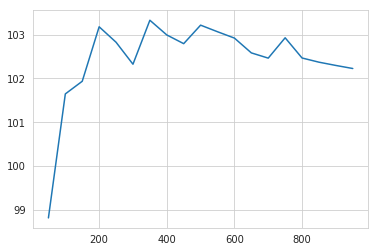

In [10]:
bold("**Visualizing best model to use**")
plt.plot(results.keys(), results.values())
plt.show

In [11]:
bold("**Evaluating the model yet for predicting confirmed cases of 2019-nCoV**")
bold("**The number below outputs our MAE score for the model**")
key_max = max(results.keys(), key=(lambda k: results[k]))
key_min = min(results.keys(), key=(lambda k: results[k]))
print('Train MAE:', get_score(key_min))

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', RandomForestRegressor(n_estimators=50, random_state=0))
                             ])
my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_test)
score = mean_absolute_error(y_test, preds)
print('MAE:', score)

**Evaluating the model yet for predicting confirmed cases of 2019-nCoV**

**The number below outputs our MAE score for the model**

Train MAE: 98.81981050399057
MAE: 35.18279757278326
